# Assignment 2 - Group 18 - Dataset : Mall_customers

#### Group 18 Members:
#### 1. 2020AIML023
#### 2. 2020AIML055
#### 3. 2020AIML081

### Tasks in this assignment is to:

#### 1. Do appropriate EDA and preprocessing on the data assigned to your group

#### 2. Cluster the data using the algorithms and details mentioned below as a guideline and find out which works best for your data

#### 3. After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific 

####    insights out of the results

##  Necessary Import Statements

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt; 
import seaborn as sns;

In [2]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import complete, fcluster, ward, average
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestCentroid


## Exploratory Data Analysis on the given data

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### Observations from info on the data :
##### 1. "Customer ID" can be deleted as its unique to each sample
##### 2. "Gender" needs to be encoded 
##### 3.  Have to choose top two features to do further analysis on 


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### Top observations here to note :
##### 1. Age starts from 18 and max Age is 70
##### 2. with mean age being at 38.85 
##### 3. Average Annual income of the customers from the given data is 60.56k USD in which the min income is 15k USD and the max is 137k USD


In [8]:
data.isna().sum()
# if the sum is zero then it can be intrepreted as there are no missing values in the data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### No missing values in the data

In [9]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
data = pd.get_dummies(data)
data = data.drop(labels = 'Gender_Male', axis = 1)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


## Plots 

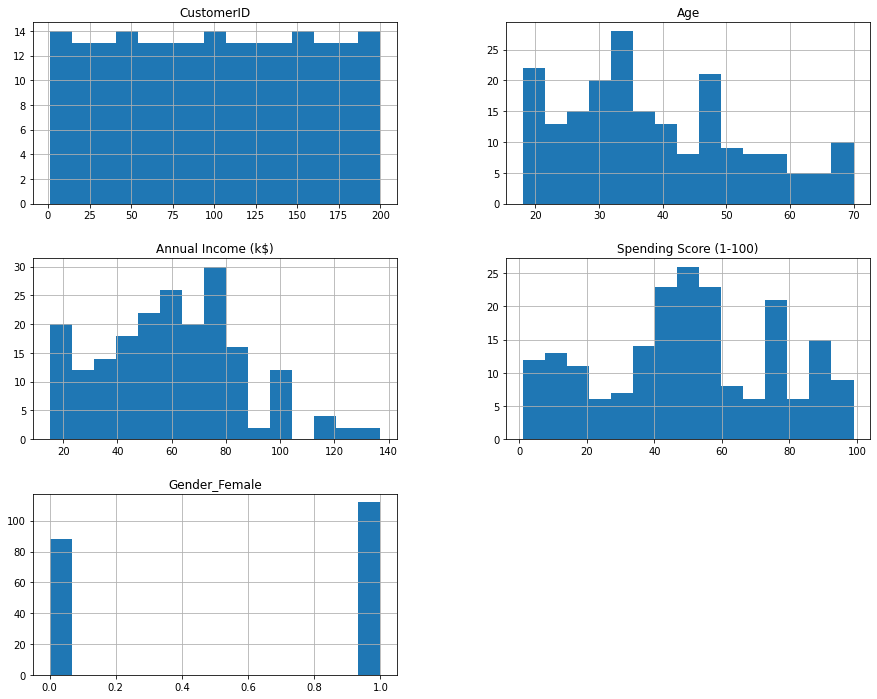

In [11]:
# Check the distribution of all the features
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

##### Top observations to note:
##### 1. There are more female samples in the data. Female samples are more than the male samples by almost 20
##### 2. Majority of the samples have a spending score in between 40-60
##### 3. There is very less number of samples with an annual income of more than 100k 
##### 4. 75 percent of the data has an age below 49


<AxesSubplot:xlabel='Annual Income (k$)'>

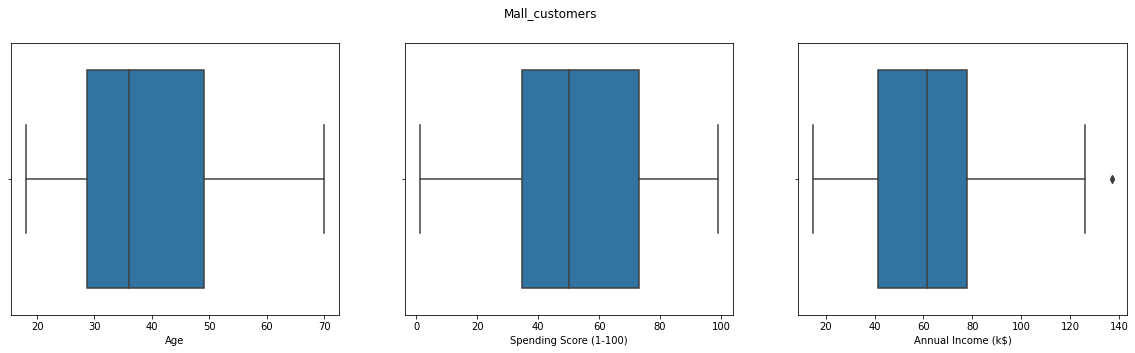

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

fig.suptitle('Mall_customers')

sns.boxplot(ax=axes[0], data=data, x=data['Age'])
sns.boxplot(ax=axes[1], data=data, x=data['Spending Score (1-100)'])
sns.boxplot(ax=axes[2], data=data, x=data['Annual Income (k$)'])


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

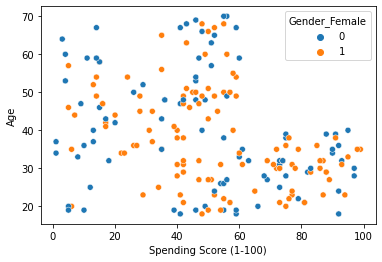

In [13]:
sns.scatterplot(data = data, x = data['Spending Score (1-100)'], y = data['Age'], hue = data['Gender_Female'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

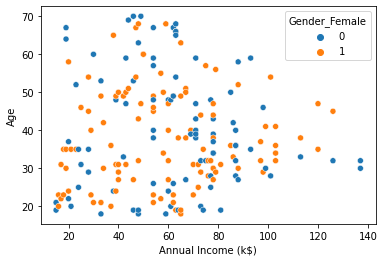

In [14]:
sns.scatterplot(data = data, x = data['Annual Income (k$)'], y = data['Age'], hue = data['Gender_Female'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

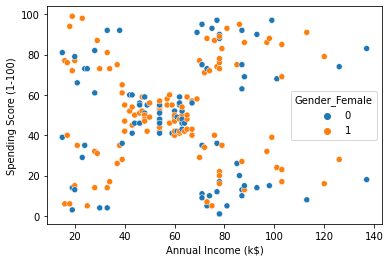

In [15]:
sns.scatterplot(data = data, x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], hue = data['Gender_Female'])

## Some Feature engineering and scaling the data

In [16]:
#Making a first subset of the data by removing redundant features
data_1 = data.drop(labels='CustomerID', axis = 1)
data_1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [17]:
#Making a second subset of the original data 
data_2 = data_1.drop(labels = ['Age','Gender_Female'], axis = 1)
data_2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
scaler = StandardScaler()
data_2 = scaler.fit_transform(data_2)
data_2 = pd.DataFrame(data_2)

In [19]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(data_2)
# data_2 = pd.DataFrame(data = principalComponents)

##### We did try out PCA method to choose the features but the results weren't that inferrrable hence we stuck with the normal approach

In [20]:
data_2.head()

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Clustering of the data using the two features by using different clustering methods

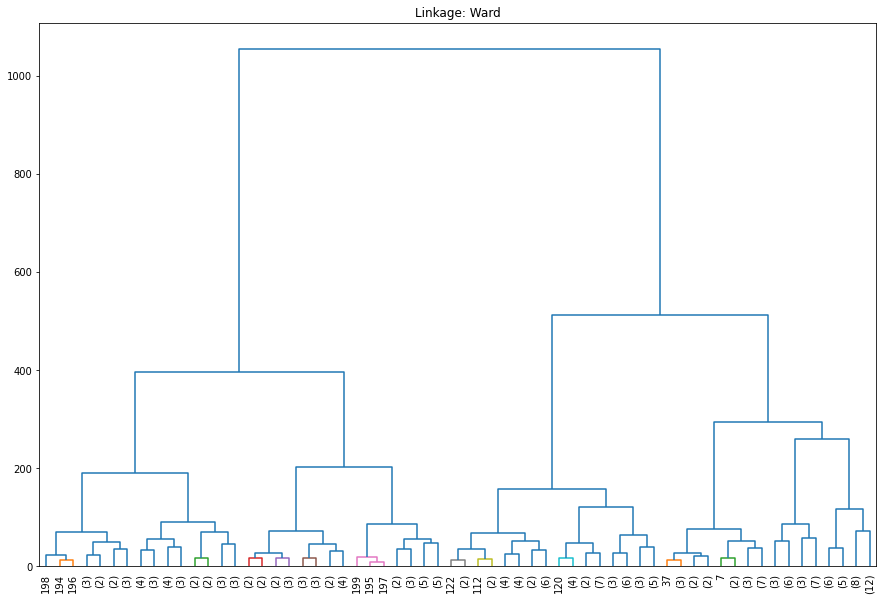

In [21]:
#Ward
Z=sch.linkage(data,method='ward')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.title("Linkage: Ward")
plt.show()

Conclusion: The optimal no. of clusters is 5 as per above dendogram for Ward Linkage.

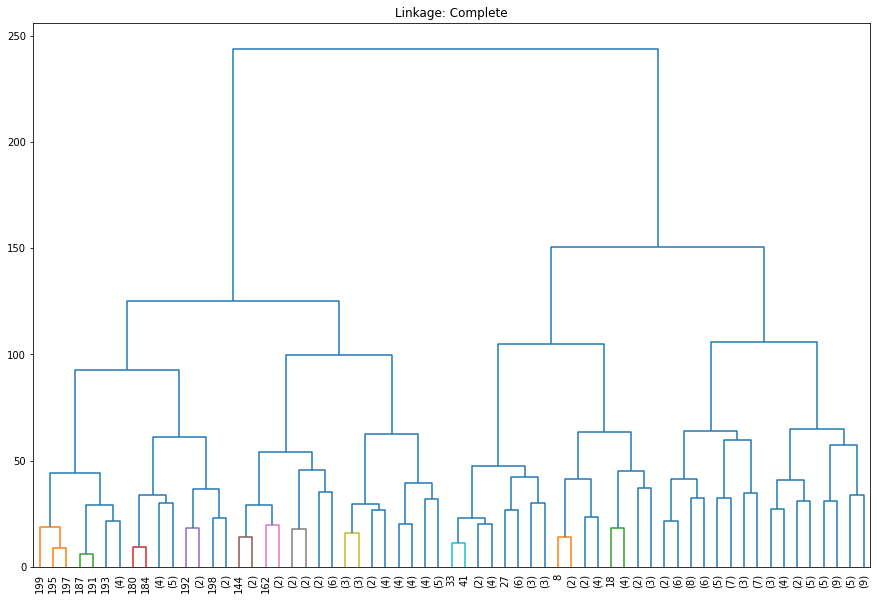

In [22]:
#Complete
Z=sch.linkage(data,method='complete')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.title("Linkage: Complete")
plt.show() 

Conclusion: The optimal no. of clusters is 5 as per above dendogram for Complete Linkage.

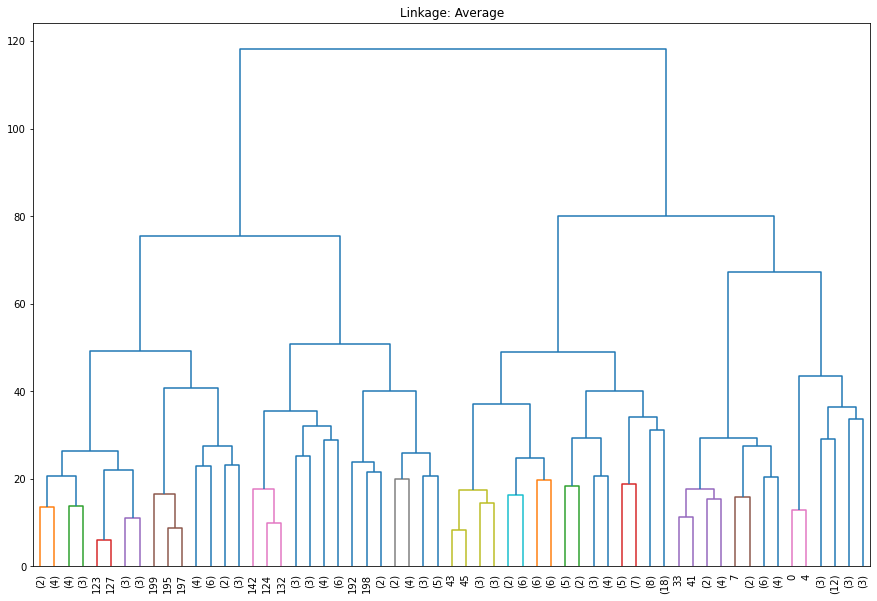

In [23]:
#Average
Z=sch.linkage(data,method='average')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.title("Linkage: Average")
plt.show() 

Conclusion: The optimal no. of clusters is 5 as per above dendogram for Average Linkage.

In [24]:
# clustering (hint: Use AgglomerativeClustering imported above)
options = { 'ward': 5, 'complete': 5, 'average': 5 }
results = []
centroids = []
for linkage in options.keys(): 
    no_of_clusters = options[linkage] 
    euclidean_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='euclidean', linkage=linkage)
    euclidean_model.fit(data)
    euclidean_labels = euclidean_model.labels_
    silhouette_avg = silhouette_score(data, euclidean_labels)
    
    y_predict = euclidean_model.fit_predict(data)
    clf = NearestCentroid()
    clf.fit(data, y_predict)
 
    for idx, centroid in enumerate(clf.centroids_):
        centroids.append( ((linkage,'euclidean', idx+1) +  tuple(centroid) ) )
   
    results.append((linkage, no_of_clusters, 'euclidean', silhouette_avg ))
    
    if(linkage != 'ward') :
        manhattan_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='manhattan', linkage=linkage)
        manhattan_model.fit(data)
        manhattan_labels = manhattan_model.labels_
        silhouette_avg = silhouette_score(data, manhattan_labels)
        
        y_predict = manhattan_model.fit_predict(data)
        clf = NearestCentroid()
        clf.fit(data, y_predict)
    
        for idx, centroid in enumerate(clf.centroids_):
            centroids.append( ((linkage,'manhattan', idx+1) +  tuple(centroid) ) )
 
        results.append((linkage, no_of_clusters,  'manhattan', silhouette_avg ))
        
        cosine_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='cosine', linkage=linkage)
        cosine_model.fit(data)
        cosine_labels = cosine_model.labels_
        silhouette_avg = silhouette_score(data, cosine_labels)
        
        y_predict = cosine_model.fit_predict(data)
        clf = NearestCentroid()
        clf.fit(data, y_predict)
        
        for idx, centroid in enumerate(clf.centroids_):
            centroids.append( ((linkage,'cosine', idx+1) +  tuple(centroid) ) )
  
        results.append((linkage, no_of_clusters,  'cosine', silhouette_avg ))

Cluster Means

In [25]:
df = pd.DataFrame(centroids, columns = ['Linkage','Distance Measure','Cluster Number'] + list(data.columns))
df.reset_index(drop=True, inplace=True) 
display( df )  

,Linkage,Distance Measure,Cluster Number,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,ward,euclidean,1,42.920000,47.920000,36.520000,37.260000,0.600000
1,ward,euclidean,2,162.000000,32.692308,86.538462,82.128205,0.538462
2,ward,euclidean,3,97.075472,39.150943,59.415094,49.433962,0.584906
3,ward,euclidean,4,162.945946,40.324324,87.432432,18.189189,0.486486
4,ward,euclidean,5,22.000000,25.333333,25.095238,80.047619,0.571429
5,complete,euclidean,1,20.575000,34.350000,24.475000,50.925000,0.575000
6,complete,euclidean,2,150.382979,35.404255,77.829787,56.617021,0.468085
7,complete,euclidean,3,105.309524,38.666667,62.452381,48.214286,0.619048
8,complete,euclidean,4,185.962963,39.074074,104.074074,42.666667,0.555556
9,complete,euclidean,5,62.840909,46.659091,46.409091,49.204545,0.590909


Cluster Quality

In [26]:
df = pd.DataFrame(results, columns =['Linkage', 'No. of Clusters', 'Distance Measure', 'Silhouette Score']) 
df.reset_index(drop=True, inplace=True) 
display( df )

,Linkage,No. of Clusters,Distance Measure,Silhouette Score
0,ward,5,euclidean,0.395157
1,complete,5,euclidean,0.267079
2,complete,5,manhattan,0.332817
3,complete,5,cosine,0.283524
4,average,5,euclidean,0.443837
5,average,5,manhattan,0.443837
6,average,5,cosine,0.281297


Conclusion: As per above table, we can conclude that Euclidean distance performs better for Ward and Cosine distance for Complete linkage. Manhattan or Euclidean distance performs better for Average linkage.

### K-Means Clustering

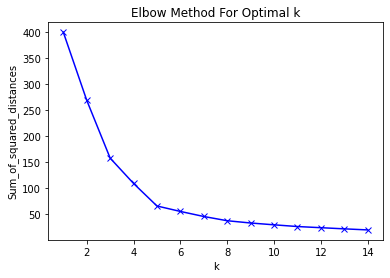

In [27]:
#KMEANS------------------ELBOW METHOD------------------------------------------
#GET OPTIMAL K & SUBSTITUTE IN THE NEXT STEP FOR KMEAN INPUT-------------------
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_2)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
expectedNumber = 5
print('K MEANS WITH NO.OF.CLUSTER :',expectedNumber ,'\n')
kmeans = KMeans(n_clusters=expectedNumber)
km=kmeans.fit(data_2)
y_pred = kmeans.predict(data_2)
print('CLUSTER FORMED WITH LABELS: ',y_pred,'\n')
kmeans_cluster_labels = km.labels_

K MEANS WITH NO.OF.CLUSTER : 5 

CLUSTER FORMED WITH LABELS:  [3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 4 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2] 



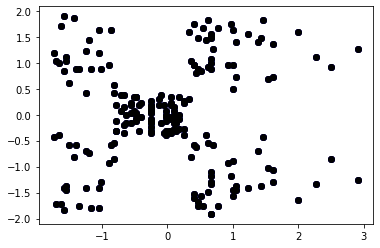

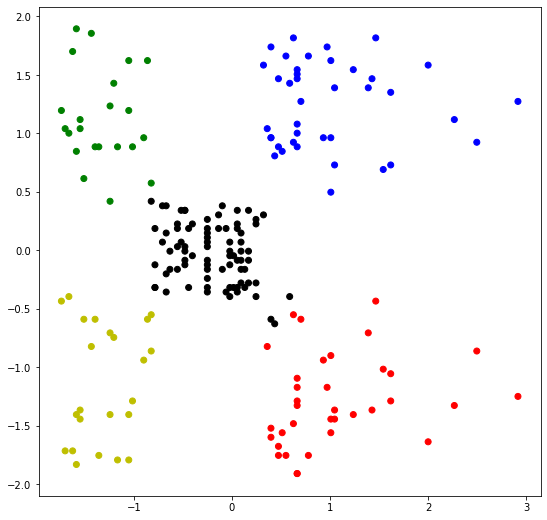

In [29]:
colours = {}
for i in range(-2,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in kmeans_cluster_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)

### Density clustering with epsilon value = 0.01

In [30]:
EPSILON = 0.01
expectedNumber = 5
DISTANCEMETRIC = 'cosine'
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(data_2)
density_clustering_labels_0_01 = db_default.labels_

In [31]:
density_clustering_labels_0_01

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0, -1,  1,  0,  1,  1, -1,  1,  0,  1,  1,  1,  1,
        2,  2,  2,  1, -1,  1,  1,  1,  2,  2,  1,  1,  1, -1,  1,  2,  1,
        2,  2,  1,  2,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,
        1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  3,
        1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,
        3,  1,  2,  1,  3,  1,  2,  1,  3,  1,  3,  1,  3], dtype=int64)

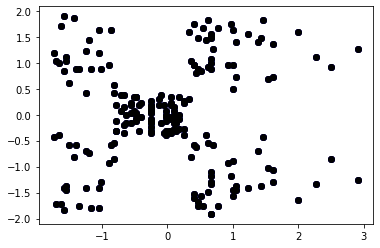

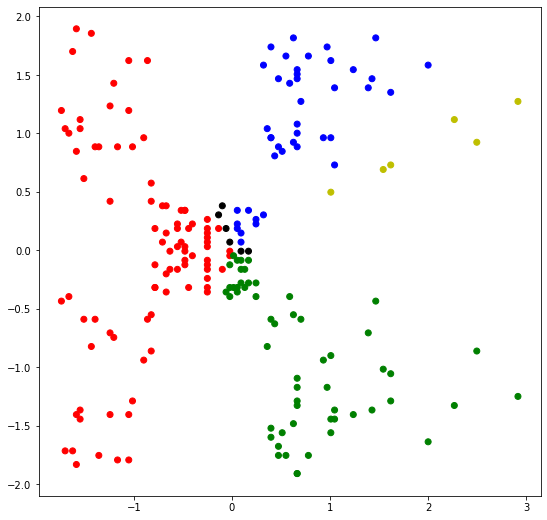

In [32]:
colours = {}
for i in range(-2,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in density_clustering_labels_0_01]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)
  
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Density clustering with epsilon value= 0.005


In [33]:
EPSILON = 0.005
expectedNumber = 5
DISTANCEMETRIC = 'cosine'
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(data_2)
density_clustering_labels_0_005 = db_default.labels_

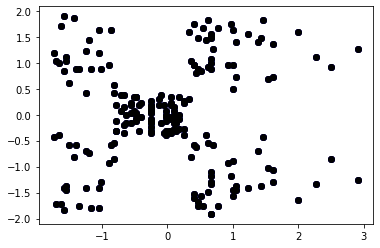

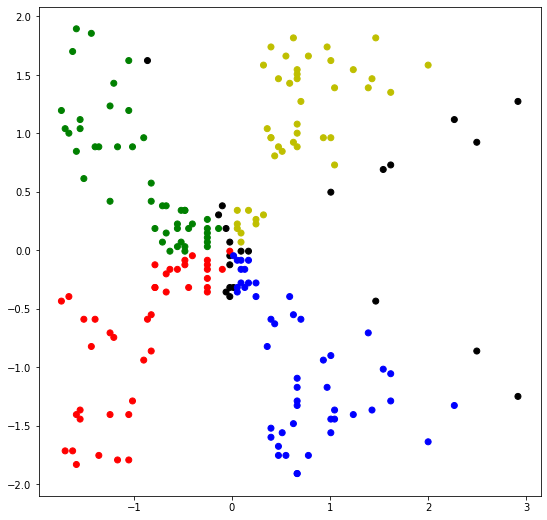

In [34]:
colours = {}
for i in range(-2,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in density_clustering_labels_0_005]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)
  
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Density clustering with epsilon value= 0.001


In [35]:
EPSILON = 0.005
expectedNumber = 5
DISTANCEMETRIC = 'cosine'
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(data_2)
density_clustering_labels_0_001 = db_default.labels_

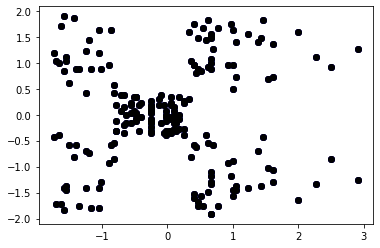

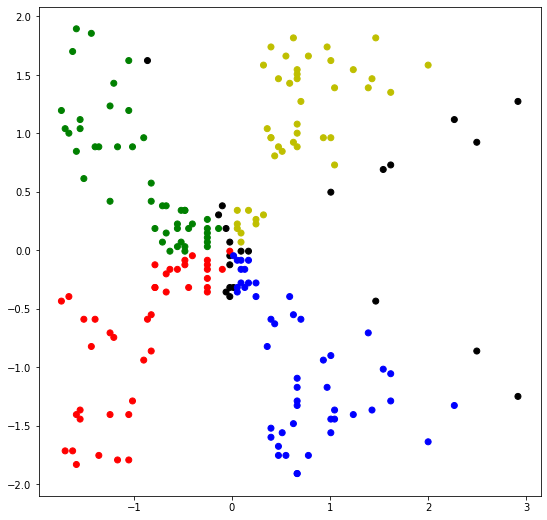

In [36]:
colours = {}
for i in range(-2,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in density_clustering_labels_0_001]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)
  
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Agglomerative clustering with linkage as complete

In [37]:
model = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='complete')
model.fit(data_2)
agglomerative_complete_labels = model.labels_
agglomerative_complete_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 3, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 3, 4,
       2, 2, 3, 3, 4, 4, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int64)

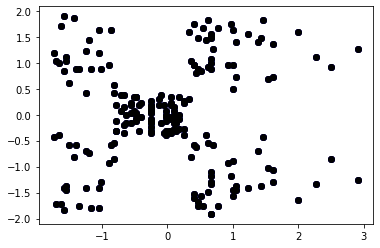

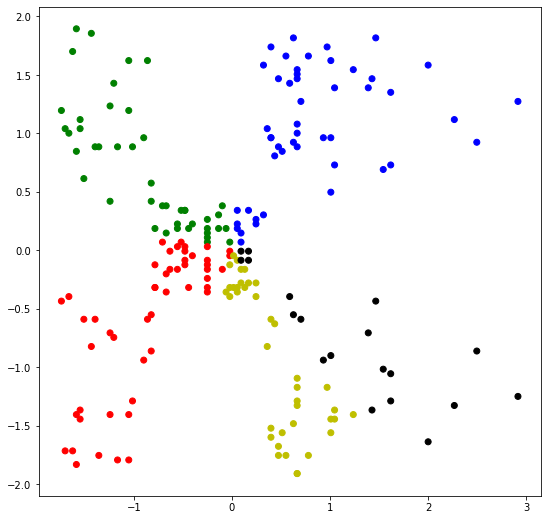

In [38]:
colours = {}
for i in range(0,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in agglomerative_complete_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)
  
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Agglomerative Clustering with linkage as ward

In [39]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(data_2)
agglomerative_ward_labels = model.labels_

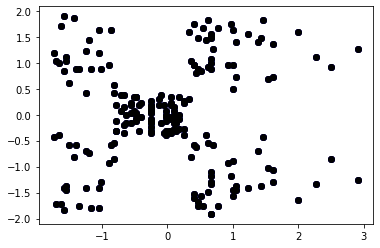

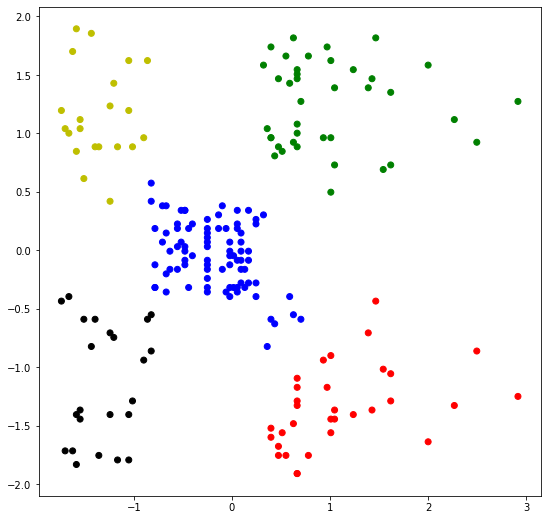

In [40]:
colours = {}
for i in range(0,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in agglomerative_ward_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)
  
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Aglomerative clustering with linkage as Average

In [41]:
model = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
model.fit(data_2)
agglomerative_average_labels = model.labels_
agglomerative_average_labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

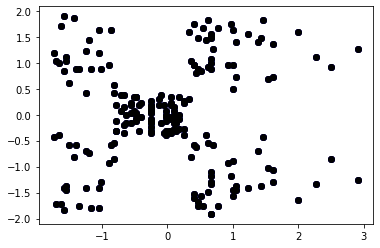

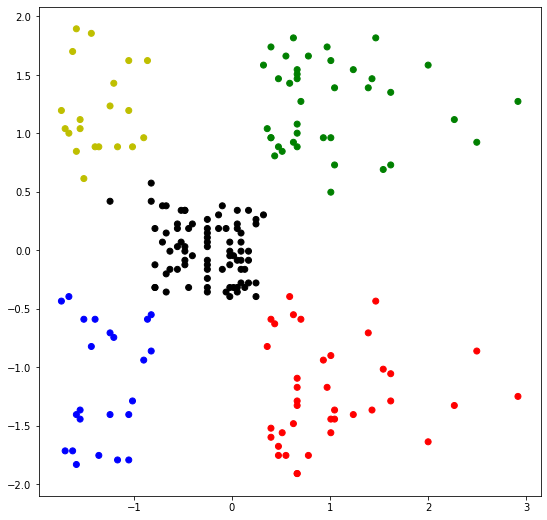

In [42]:
colours = {}
for i in range(0,25):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in agglomerative_average_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(data_2[0], data_2[1], c = cvec)
  
# Building the legend
#plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Finding the best clustering using Silhouette Score:

In [43]:
print(f'Silhouette Score for kmeans clustering is                          : {silhouette_score(data_2, kmeans_cluster_labels)}')
print(f'Silhouette Score Density clustering with epsilon value = 0.01      : {silhouette_score(data_2, density_clustering_labels_0_01)}')
print(f'Silhouette Score Density clustering with epsilon value = 0.005     : {silhouette_score(data_2, density_clustering_labels_0_005)}')
print(f'Silhouette Score Density clustering with epsilon value = 0.001     : {silhouette_score(data_2, density_clustering_labels_0_001)}')
print(f'Silhouette Score Agglomerative clustering with linkage as complete : {silhouette_score(data_2, agglomerative_complete_labels)}')
print(f'Silhouette Score Agglomerative clustering with linkage as Ward     : {silhouette_score(data_2, agglomerative_ward_labels)}')
print(f'Silhouette Score Agglomerative clustering with linkage as Average  : {silhouette_score(data_2, agglomerative_average_labels)}')

Silhouette Score for kmeans clustering is                          : 0.5546571631111091
Silhouette Score Density clustering with epsilon value = 0.01      : 0.005352491148948131
Silhouette Score Density clustering with epsilon value = 0.005     : 0.2583802912416874
Silhouette Score Density clustering with epsilon value = 0.001     : 0.2583802912416874
Silhouette Score Agglomerative clustering with linkage as complete : 0.2841427483378806
Silhouette Score Agglomerative clustering with linkage as Ward     : 0.5538089226688662
Silhouette Score Agglomerative clustering with linkage as Average  : 0.5510982517027394


##### The reason why that the best of the scores are somewhere around 0.5 because we choose a higher number of clusters i.e 5

### Choosing the best clustering based on the metric

##### Note: We are not entirely sure whether kmeans can be used in this assignment so based on the scores here we are choosing the next best clustering which is pretty much has the same Silhouette Score as the final one

#### So our final clustering algorithm for this data set is Agglomerative clustering with linkage as Ward

##### Plotting it here again

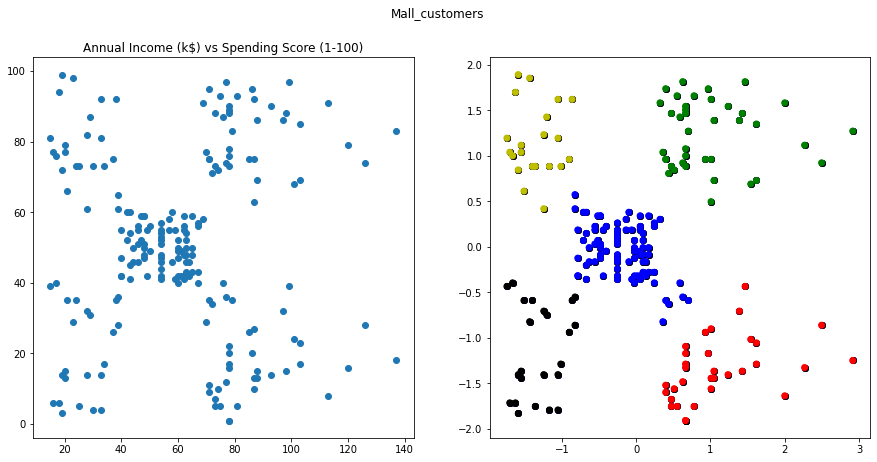

<Figure size 1080x504 with 0 Axes>

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

fig.suptitle('Mall_customers')
axs[0].scatter( x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'])
axs[0].set_title("Annual Income (k$) vs Spending Score (1-100)")

colours = {}
for i in range(0,5):
    colours[i] = 'k'
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in agglomerative_ward_labels]
  
# For the construction of the legend of the plot
r = plt.scatter(data_2[0], data_2[1], color ='r');
g = plt.scatter(data_2[0], data_2[1], color ='g');
b = plt.scatter(data_2[0], data_2[1], color ='b');
k = plt.scatter(data_2[0], data_2[1], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(15, 7))
axs[1].scatter(data_2[0], data_2[1], c = cvec)
  
plt.show()

### Interpretation

#### Insights from the clustering
#### 1. If we look at the boxplots in the plots section above in this notebook we can see that majority of the data is clustered in between areas of 40-70 in case of Annual income and 40-60 in the case of Spending score and 18-49 in the case of Age and This can clearly be observed in the center cluster with blue coloured points
#### 2. There are very few samples of annual income 20k and spending score as 100 Like wise with annual income as 120+k and spending score of 0-10. This Should definitely be noted as they are to be less concentrated while target marketing because people with almost perfect spending score do not need to be bothered with ads and Its better to spend less time on targeting people with more income but less spending score because these resources could be fruitful elsewhere
#### 3. And the main cluster of people to be more targeted or should be more put into intrest are the middle cluster one i.e with
#### 3 a. Annual income of 40-70k USD 
#### 3 b. Spending score of 40-60 